In [1]:
import pandas as pd
import numpy as np
import random

# set seed for reproducibility 
random.seed(42)

# Generate sample data
num_samples = 5000

# Sample customer IDs
customer_ids = ['C' + str(i).zfill(4) for i in range(1, num_samples +1)]

# sample credit scores ranging from 300 - 850
credit_scores = [random.randint(300, 850) for _ in range(num_samples)]

# sample ages from 18 to 80
ages = [random.randint(18,80) for _ in range(num_samples)]

# sample income between 20000 and 200000
income = [random.randint(20000, 200000) for _ in range(num_samples)]

#sample loan amounts from 1000 to 100000
loan_amounts = [random.randint(1000,100000) for _ in range(num_samples)]

#introduce missing values for loans
missing_indices = random.sample(range(num_samples), int(0.05*num_samples)) #5% missing values
for index in missing_indices:
    loan_amounts[index] = np.nan
    
# Sample loan durations (ranging from 1 to 60 months)
loan_durations = [random.randint(1,60) for _ in range(num_samples)]

# introduce outliers for loan durations
outlier_indices = random.sample(range(num_samples), int(0.02*num_samples)) # 2% outliers
for index in outlier_indices:
    loan_durations[index] = random.randint(120,240) # Outliers ranging from 10 to 20 years

# Sample loan types
loan_types = ['Personal Loan', 'Car Loan', 'Home Loan', 'Education Loan']
loan_purposes = [random.choice(loan_types) for _ in range(num_samples)]

# sample employment status
employment_status = ['Employed', 'Unemployed', 'Self Employed']
employment = [random.choice(employment_status) for _ in range(num_samples)]

# Sample default status
default_status = [random.choice([True, False]) for _ in range(num_samples)]

# Create data frame
data = pd.DataFrame({
    'CustomerID': customer_ids,
    'CreditScore': credit_scores,
    'Age': ages,
    'Income': income,
    'LoanAmount': loan_amounts,
    'LoanDurationMonths': loan_durations,
    'LoanPurpose': loan_purposes,
    'EmploymentStatus': employment,
    'DefaultStatus': default_status
})

# Display first few rows of the dataset
data


,CustomerID,CreditScore,Age,Income,LoanAmount,LoanDurationMonths,LoanPurpose,EmploymentStatus,DefaultStatus
0,C0001,414,57,190156,37564.0,55,Car Loan,Unemployed,False
1,C0002,325,70,190725,19405.0,40,Personal Loan,Self Employed,False
2,C0003,581,69,40322,75060.0,37,Education Loan,Unemployed,False
3,C0004,550,46,161203,42358.0,52,Personal Loan,Self Employed,False
4,C0005,528,57,28112,55261.0,60,Personal Loan,Employed,False
...,...,...,...,...,...,...,...,...,...
4995,C4996,652,43,101392,69224.0,26,Home Loan,Unemployed,True
4996,C4997,324,52,33981,74585.0,37,Car Loan,Employed,False
4997,C4998,612,23,119433,16269.0,28,Car Loan,Employed,False
4998,C4999,473,68,95255,78710.0,59,Personal Loan,Unemployed,True


**DATA WRANGLING**

In [2]:
# Dimensions of thedataset
dimensions = data.shape
print(f"The dataset contains {dimensions[0]} records and {dimensions[1]} columns")

The dataset contains 5000 records and 9 columns


In [3]:
#missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

LoanAmount    250
dtype: int64


In [4]:
# Calculating the medians for the columns with missing values
median_LoanAmount = data['LoanAmount'].median()

#Filling missing rows with median value
data['LoanAmount'] = data['LoanAmount'].fillna(median_LoanAmount)

# print results
print('median_LoanAmount: ', median_LoanAmount)
missing_values = data.isnull().sum()
print('Missing Values: ', missing_values[missing_values > 0])

median_LoanAmount:  50279.5
Missing Values:  Series([], dtype: int64)


In [5]:
# identify duplicates
number_of_duplicates = data.duplicated().sum()
print('number_of_duplicates: ', number_of_duplicates)

number_of_duplicates:  0


In [6]:
# handling non-numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['LoanPurpose'] = label_encoder.fit_transform(data['LoanPurpose'])
data['EmploymentStatus'] = label_encoder.fit_transform(data['EmploymentStatus'])
data['DefaultStatus'] = label_encoder.fit_transform(data['DefaultStatus'])

In [7]:
# Handling outliers
def handle_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] > lower_bound) & (data[col] < upper_bound)]  # Corrected condition
    return data

outlier_columns = ['CreditScore', 'Age', 'Income', 'LoanAmount', 'LoanDurationMonths']

data_cleaned = handle_outliers(data, outlier_columns)
data_cleaned

,CustomerID,CreditScore,Age,Income,LoanAmount,LoanDurationMonths,LoanPurpose,EmploymentStatus,DefaultStatus
0,C0001,414,57,190156,37564.0,55,0,2,0
1,C0002,325,70,190725,19405.0,40,3,1,0
2,C0003,581,69,40322,75060.0,37,1,2,0
3,C0004,550,46,161203,42358.0,52,3,1,0
4,C0005,528,57,28112,55261.0,60,3,0,0
...,...,...,...,...,...,...,...,...,...
4995,C4996,652,43,101392,69224.0,26,2,2,1
4996,C4997,324,52,33981,74585.0,37,0,0,0
4997,C4998,612,23,119433,16269.0,28,0,0,0
4998,C4999,473,68,95255,78710.0,59,3,2,1


**DATA EXPLORATION**

In [8]:
# descriptive stats
data_cleaned.describe()

,CreditScore,Age,Income,LoanAmount,LoanDurationMonths,LoanPurpose,EmploymentStatus,DefaultStatus
count,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000,4900.000000
mean,577.062857,49.130816,108781.052449,50599.940204,30.633061,1.476735,0.995102,0.491633
std,158.018529,18.132933,52052.734664,27608.656665,17.546778,1.127361,0.818230,0.499981
min,300.000000,18.000000,20009.000000,1001.000000,1.000000,0.000000,0.000000,0.000000
25%,439.000000,34.000000,63547.500000,27286.500000,15.000000,0.000000,0.000000,0.000000
50%,578.000000,49.000000,108014.500000,50279.500000,31.000000,1.000000,1.000000,0.000000
75%,713.000000,65.000000,152906.250000,73525.750000,46.000000,2.000000,2.000000,1.000000
max,850.000000,80.000000,199900.000000,99981.000000,60.000000,3.000000,2.000000,1.000000


In [9]:
median_DefaultStatus = data_cleaned['DefaultStatus'].median()
print('median_DefaultStatus:', median_DefaultStatus)

median_DefaultStatus: 0.0


,CreditScore,Age,Income,LoanAmount,LoanDurationMonths,LoanPurpose,EmploymentStatus,DefaultStatus
CreditScore,1.000000,0.014387,0.003563,0.007112,-0.006871,0.005398,0.006892,0.022632
Age,0.014387,1.000000,-0.016400,-0.018801,0.021167,0.019166,0.013911,0.023165
Income,0.003563,-0.016400,1.000000,-0.016532,0.019632,0.014666,0.014185,0.013668
LoanAmount,0.007112,-0.018801,-0.016532,1.000000,0.000320,0.007271,-0.018920,-0.006643
LoanDurationMonths,-0.006871,0.021167,0.019632,0.000320,1.000000,-0.027694,0.018315,-0.013961
LoanPurpose,0.005398,0.019166,0.014666,0.007271,-0.027694,1.000000,-0.004107,-0.011391
EmploymentStatus,0.006892,0.013911,0.014185,-0.018920,0.018315,-0.004107,1.000000,0.020856
DefaultStatus,0.022632,0.023165,0.013668,-0.006643,-0.013961,-0.011391,0.020856,1.000000


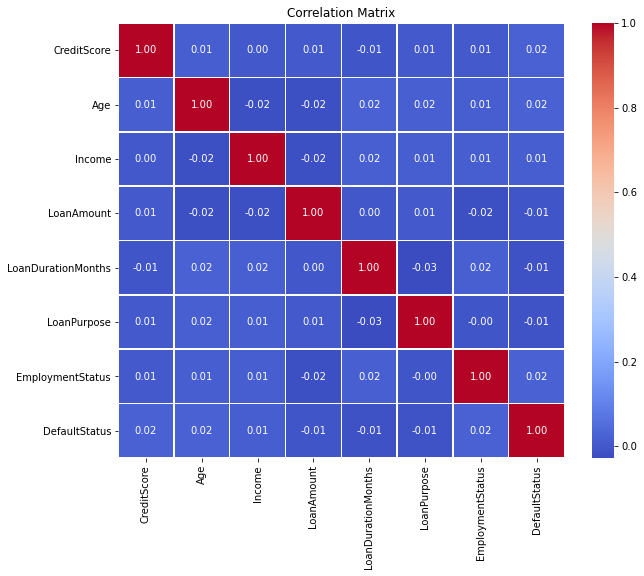

In [10]:
# Correlation Analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns
numeric_data_cleaned = data_cleaned.select_dtypes(include=[np.number])

# Claculate the correlation matrix
correlation_matrix = numeric_data_cleaned.corr()

# Display the correlation matrix
display(correlation_matrix)

# Visualise the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

**DATA MODELING**

**REGRESSION ANALYSIS**

In [11]:
numeric_data_cleaned

,CreditScore,Age,Income,LoanAmount,LoanDurationMonths,LoanPurpose,EmploymentStatus,DefaultStatus
0,414,57,190156,37564.0,55,0,2,0
1,325,70,190725,19405.0,40,3,1,0
2,581,69,40322,75060.0,37,1,2,0
3,550,46,161203,42358.0,52,3,1,0
4,528,57,28112,55261.0,60,3,0,0
...,...,...,...,...,...,...,...,...
4995,652,43,101392,69224.0,26,2,2,1
4996,324,52,33981,74585.0,37,0,0,0
4997,612,23,119433,16269.0,28,0,0,0
4998,473,68,95255,78710.0,59,3,2,1


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression

# Ensure the data is clean
numeric_data_cleaned2 = numeric_data_cleaned.copy()

# Define the features and target
X = numeric_data_cleaned2.drop('DefaultStatus', axis=1)
y = numeric_data_cleaned2['DefaultStatus'].astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = LogisticRegression(solver='liblinear')  # specify a solver, e.g., 'liblinear' for small datasets

# Fit the model
clf.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

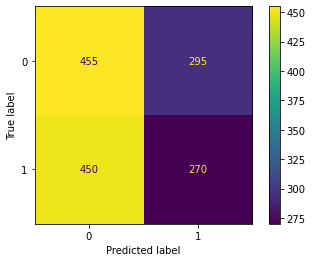

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Using confusion matrix to visualize the model

y_pred = clf.predict(X_test)

#Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

Mean Squared Error: 0.24968360818815452
Mean Absolute Error: 0.4990719086735881
R-squared: 0.0003287657992556703


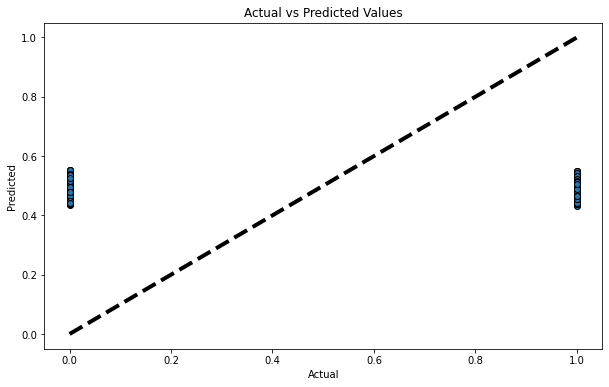

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Ensure the data is clean
numeric_data_cleaned2 = numeric_data_cleaned.copy()

# Define the features and target
X = numeric_data_cleaned2.drop('DefaultStatus', axis=1)
y = numeric_data_cleaned2['DefaultStatus']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
lr = LinearRegression()

# Fit the model
lr.fit(X_train, y_train)

# Predict the test set results
y_pred = lr.predict(X_test)

# Compute regression metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0))
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

**SUMMARY STATISTICS**

In [15]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Train the Ridge Regression model
ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = ridge_reg.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Display model coefficients
print('Model Coefficients:', ridge_reg.coef_)

Mean Squared Error: 0.24968365337132287
R^2 Score: 0.0003285848970571159
Model Coefficients: [ 5.83447477e-05  6.74224514e-04  1.21837704e-07  4.47384616e-08
 -7.30762370e-04 -5.29248092e-03  1.08786230e-02]


**DECISION TREE MODEL**

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the dataset into features and target
X = numeric_data_cleaned2.drop('DefaultStatus', axis=1)
y = numeric_data_cleaned2['DefaultStatus']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

# Train the model
dt_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Decision Tree Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.4806122448979592
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       505
           1       0.46      0.43      0.45       475

    accuracy                           0.48       980
   macro avg       0.48      0.48      0.48       980
weighted avg       0.48      0.48      0.48       980



**RANDOM FOREST MODEL**

In [17]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Random Forest Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.49387755102040815
              precision    recall  f1-score   support

           0       0.51      0.54      0.52       505
           1       0.48      0.45      0.46       475

    accuracy                           0.49       980
   macro avg       0.49      0.49      0.49       980
weighted avg       0.49      0.49      0.49       980



**CLUSTERING MODEL**

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

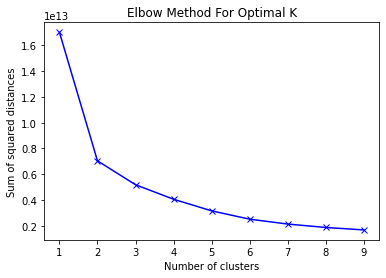

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Cluster Centers:
[[5.81975896e+02 4.88325093e+01 1.10261019e+05 5.28841146e+04
  3.02107540e+01 1.48516687e+00 1.00370828e+00]
 [5.75191919e+02 4.88244949e+01 1.70128830e+05 4.89367156e+04
  3.11963384e+01 1.49431818e+00 1.01199495e+00]
 [5.74126620e+02 4.97008245e+01 5.01417921e+04 4.99749423e+04
  3.05100118e+01 1.45229682e+00 9.71142521e-01]]


In [18]:
from sklearn.cluster import KMeans

# Select numerical features
cluster_data = numeric_data_cleaned2.drop('DefaultStatus', axis=1)

# Determine the optimal number of clusters (you can use various techniques like the elbow method)
sum_of_squared_distances = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(cluster_data)
    sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow curve
import matplotlib.pyplot as plt
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal K')
plt.show()

# Based on the elbow curve, choose the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(cluster_data)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataset
numeric_data_cleaned2['Cluster'] = cluster_labels

# Print the cluster centers
print('Cluster Centers:')
print(kmeans.cluster_centers_)

**CROSS VALIDATION**

In [23]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Function to evaluate classification model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Classification report
    report = classification_report(y_test, y_pred)
    
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(report)

# Evaluate Logistic Regression model
print("Logistic Regression Model Evaluation:")
evaluate_model(clf, X_test, y_test)

# Evaluate Decision Tree model
print("\nDecision Tree Model Evaluation:")
evaluate_model(dt_clf, X_test, y_test)

# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
evaluate_model(rf_clf, X_test, y_test)

Logistic Regression Model Evaluation:
Accuracy: 0.52
Precision: 0.50
Recall: 0.37
F1-Score: 0.42
Confusion Matrix:
[[330 175]
 [300 175]]
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.65      0.58       505
           1       0.50      0.37      0.42       475

    accuracy                           0.52       980
   macro avg       0.51      0.51      0.50       980
weighted avg       0.51      0.52      0.51       980


Decision Tree Model Evaluation:
Accuracy: 0.48
Precision: 0.46
Recall: 0.43
F1-Score: 0.45
Confusion Matrix:
[[266 239]
 [270 205]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.51       505
           1       0.46      0.43      0.45       475

    accuracy                           0.48       980
   macro avg       0.48      0.48      0.48       980
weighted avg       0.48      0.48      0.48       980


Random Forest Model Evaluati